# Plotly Tutorial

In this tutorial, we will cover the basics for working with the charting library [plotly](https://plotly.com/), which allows us to create interactive visualizations for our python analytics. Throughout this tutorial, we will be working inside this Jupyter Notebook, but plotly can just as well be used without Jupyter from a .py file. We will recreate the famous [Gapminder visualization](https://gapminder.org/tools) using plotly, including the interactive timeline to move between years.

The goal of this tutorial is to get an idea of how we can use plotly for visualizing data from a Python perspective. We will cover the basics of installing plotly on our computer, have a look at the express package that offers great pre-defined charts and afterwards go into customizing the behavior of our charts. 

Below is a table of contents:

## Contents
1. <a href="#1.-Installation---Setting-things-up">Installation - Setting things up</a>
2. <a href="#2.-Basic-Visualizations---Using-the-Express-package">Basic Visualizations - Using the Express package</a>
3. <a href="#3.-Adding-Interaction---Linking-Views">Adding Interaction - Linking Views</a>
4. <a href="#4.-Beyond-Plotly---Coordinating-Multiple-Visualizations-with-Dash">Beyond Plotly - Coordinating Multiple Visualizations with Dash</a>

<h2 id="installation">1. Installation - Setting things up</a>

The first step before we can get into using plotly is to install the necessary Python packages. Here, we will use pip to install plotly on our machine (in case you are using Miniconda to run your jupyter environment, use ```conda install plotly``` intead). With [pip all set up and ready to go](https://pip.pypa.io/en/stable/installing/), this is rather straightforward, simply run the cell below to install version 4.9.0 using pip:

In [ ]:
pip install pandas plotly==4.9.0

To use plotly inside Jupyter, we need to also install the dedicated jupyter packages:

In [ ]:
pip install "ipywidgets==7.5"

Then, we need to install an extension to Jupyter lab, that let's us show in-line visualizations. For this, **in your terminal**, run the following command and restart jupyter lab:

```
jupyter labextension install jupyterlab-plotly@4.9.0
```

<br/>

And that's it. You have now installed plotly on your machine, including the extensions that allow you to use plotly right here inside jupyter lab. To test if everything worked as expected, run the following cell. If your installation was successful, a bar chart should show.

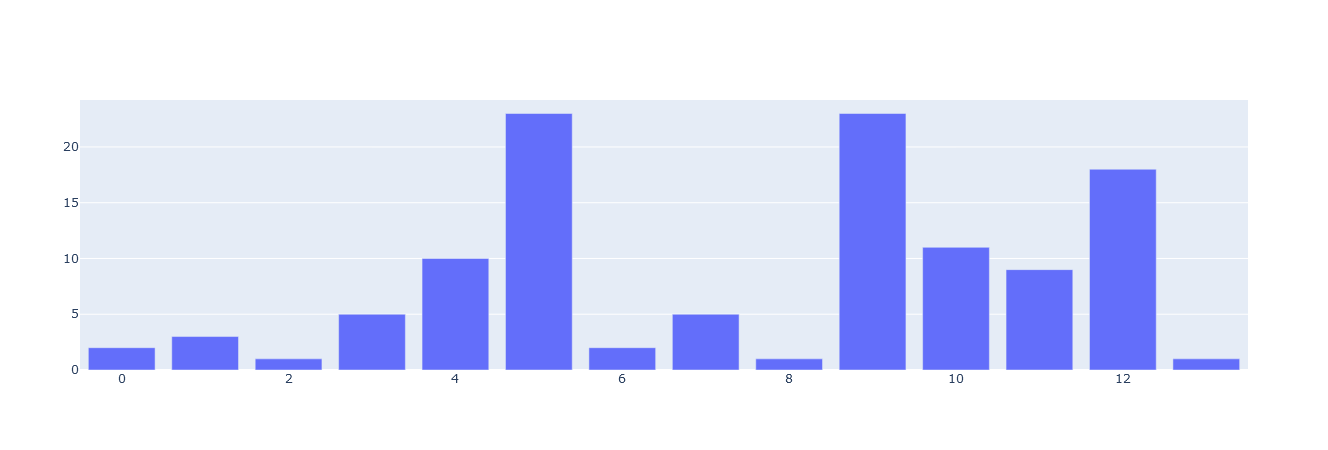

In [3]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(y=[2, 3, 1, 5, 10, 23, 2, 5, 1, 23, 11, 9, 18, 1]))
fig.show()

<h2 id="basic_visualizations">2. Basic Visualizations - Using the Express package</h2>

### Part 1: Getting the data

Now that we have everything up and running, we can actually start using plotly to visualize some data. Plotly provides us a with a wide variety of pre-defined visualizations, which we can use through the express package. Let's import that one first:

In [4]:
import plotly.express as px

Next, let's get some data to visualize. The great thing is that plotly comes with its own package full of <a href="https://plotly.com/python-api-reference/generated/plotly.data.html#module-plotly.data">demo datasets</a>, which are all available in express. For this tutorial, we will use the gapminder dataset, which you might have seen in the <a href="https://www.youtube.com/watch?v=hVimVzgtD6w">engaging presentations by Hans Rosling</a> or on the <a href="https://gapminder.org/tools">GapMinder website</a>.
 
The data contains metrics on most countries (life expectancy rate, population, GDP per capita). It allows us to visualize some basic global developments in health and wealth of nations. Here's what our data looks like:

In [5]:
data = px.data.gapminder()
data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


For your own project, it might be good to know that to visualize multivariate data like this in plotly, it must be stored inside a <a href="https://pandas.pydata.org/pandas-docs/stable/index.html">pandas dataframe</a>. Fortunately, all datasets in the px.data package are already in that format, so we don't need to convert anything here.

Notice that this is not the complete gapminder dataset, but a sample that contains data from 12 years, measured in 5-year intervals beginning in 1952:

In [6]:
data.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

This is good enough for this tutorial, but of course not as interesting as were we to have all data available to us.

### Part 2: A simple Scatterplot

So now that we have our dataset in place, the next thing we want to do is visualize it. Our goal today is to make an interactive visualization of the gapminder dataset, similar to the one on the <a href="https://gapminder.org/tools">GapMinder website</a>. 

As a first step, let's create a simple scatter plot for the _lifeexp_ and _gdppercap_ dimensions (read more about the scatter plot figure in the [plotly docs](https://plotly.com/python/line-and-scatter/)). 

Let's say we are interested in the latest data available for countries.

In [7]:
latest_data = data[data.year == 2007]
latest_data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


To visualize this data in a scatter plot, we can use the _scatter_ function in express:

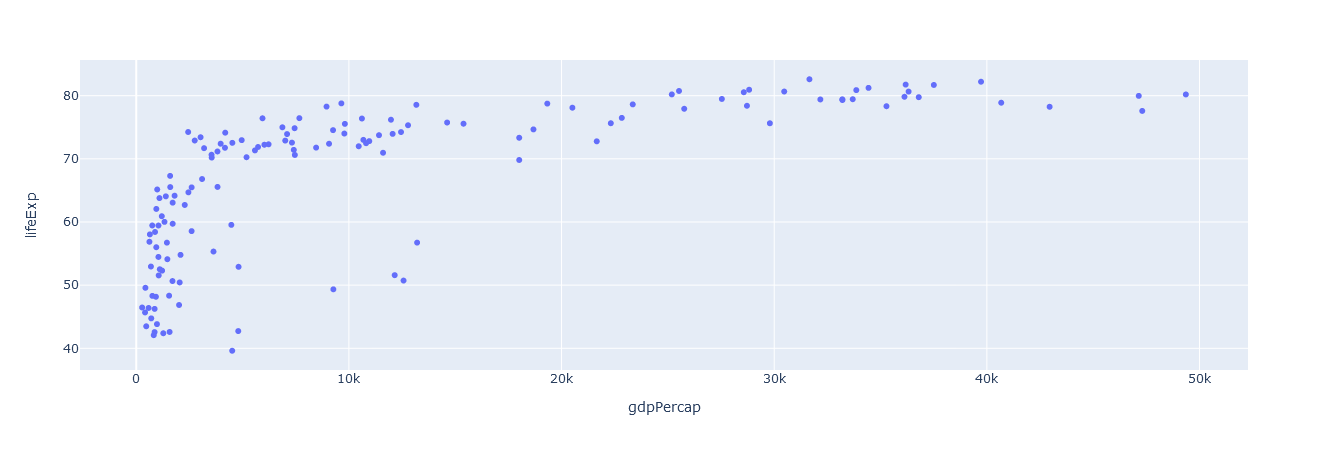

In [8]:
fig = px.scatter(latest_data, 
                 x='gdpPercap',
                 y='lifeExp')
fig.show()

#### Adding a Color Encoding

So we now have a very basic impression of what the data _looks_ like. Going further, we'll extend this visualization to make it look and feel like the original GapMinder tool. The first thing we can do is to introduce color as an additional encoding. On GapMinder, color represents the continent of a country. In our table above, we can see that this dimension is conventiently called _continent_. 

So all we have to do is add the color encoding to the _continent_ dimension to our visualization (read more about color encodings in the [plotly docs](https://plotly.com/python/discrete-color/)):

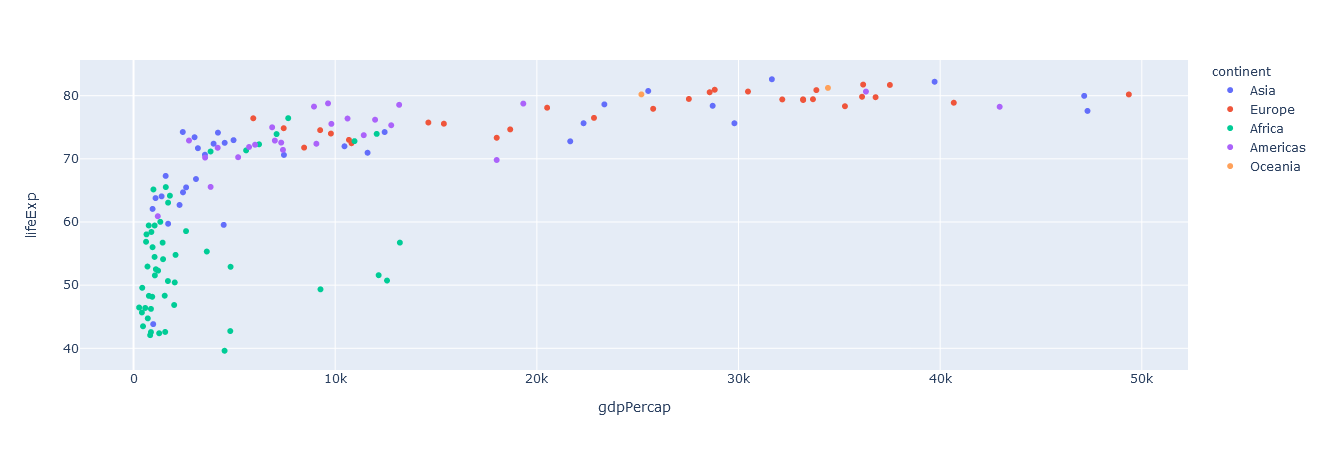

In [9]:
fig = px.scatter(latest_data, 
                 x='gdpPercap',
                 y='lifeExp',
                 color='continent') # <-- adding an encoding from the 'continent' dimension to the color of the circles
fig.show()

We can even go a step further and use the same colors as GapMinder, using the _color_discrete_sequence_ property, where we can put in the RGB values for each continent:

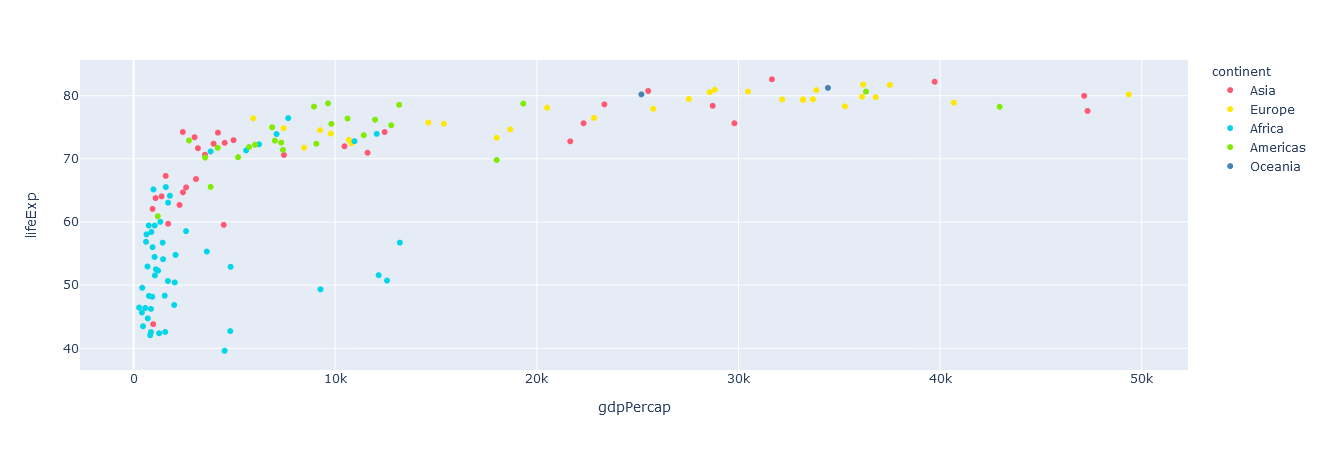

In [10]:
fig = px.scatter(latest_data, 
                 x='gdpPercap',
                 y='lifeExp',
                 color='continent',
                 color_discrete_sequence=["rgb(255, 88, 114)", "rgb(255, 231, 0)", "rgb(0, 213, 233)", "rgb(127, 235, 0)", "steelblue"]) # <-- changing the color scale
fig.show()

#### Updating an Axis

Next, we will make our visualization spatially resemble GapMinder, by changing its axes (read more about axes in the [plotly docs](https://plotly.com/python/axes/)).

When comparing our visualization to GapMinder's, we can see that their x axis differs from ours, in that values double for equal intervals, i.e., it uses a logarithmic mapping. Our x axis using the default configuration of plotly uses a linear mapping. Fortunately, we can just tell plotly to use logarithmic axes instead, by setting the _log_x_ property of the _scatter()_ function to ```True```:

_(Notice, however, that GapMinder uses a logarithmic axis with base 2, while in plotly we can only use base 10 logarithmic axes - [except if we explicitly specify, what tick marks to use on the axes](https://plotly.com/python/tick-formatting/).)_

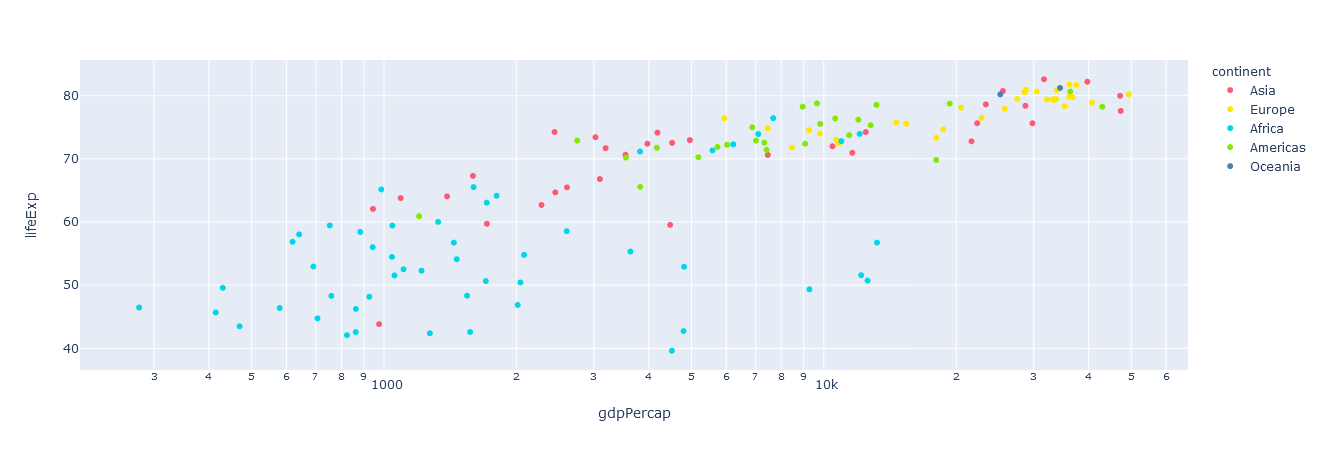

In [11]:
fig = px.scatter(latest_data, 
                 x='gdpPercap',
                 log_x=True, # <-- changing the axis mapping from linear to logarithmic with base 10.
                 y='lifeExp',
                 color='continent',
                 color_discrete_sequence=["rgb(255, 88, 114)", "rgb(255, 231, 0)", "rgb(0, 213, 233)", "rgb(127, 235, 0)", "steelblue"])
fig.show()

Next, we will update the y axis of our viusalization. 

We can see that on GapMinder, their y axis starts at around 20 to cover the lower values in the late 19th century, while plotly in our case started it at around 40, which made sense, because this is approximately the lowest _lifeExp_ value in our data (Swaziland in 2007 had a life expectancy of only 39.613 years).
We can fix our visualization by explicitly telling plotly to start the y axis at 20 as well using the _update_y_axis()_ function. We specify the _range_ of the axis to the value interval from 20 to 90. 

_(Notice that this function is run __after__ we have created the figure object.)_

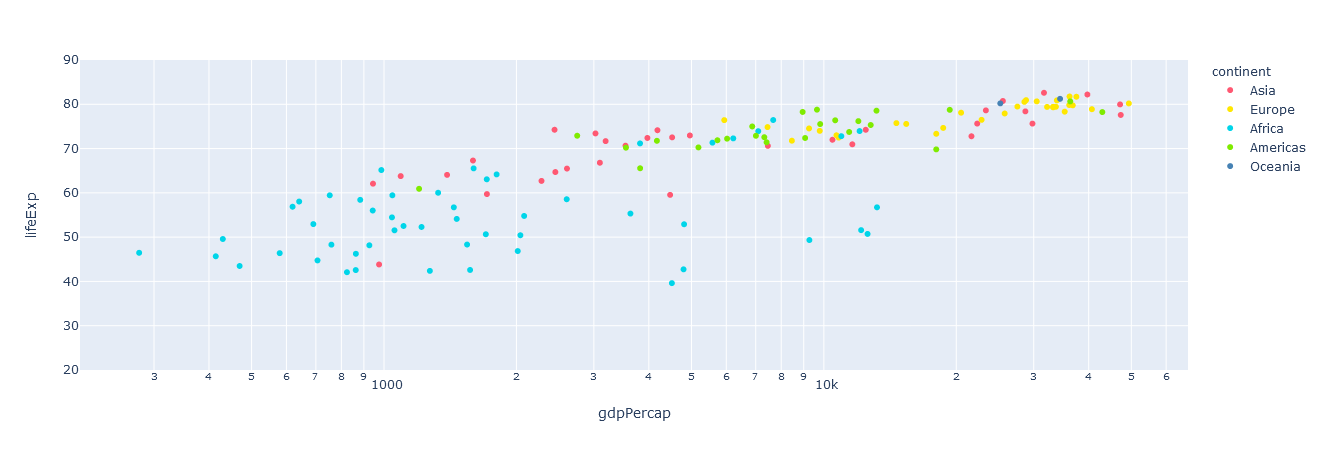

In [12]:
fig = px.scatter(latest_data, 
                 x='gdpPercap',
                 log_x=True,
                 y='lifeExp',
                 color='continent',
                 color_discrete_sequence=["rgb(255, 88, 114)", "rgb(255, 231, 0)", "rgb(0, 213, 233)", "rgb(127, 235, 0)", "steelblue"])

fig.update_yaxes(range=[20, 90]) # <-- setting the minimum-maximum range for the y axis to a fixed interval.
fig.show()

For good measure, we can also udpate the overall size of our chart by setting the _height_ property, so that we have a approximately the same aspect ratio as GapMinder. Let's also add the name of each country to the tooltip, so we can better analyze our data:

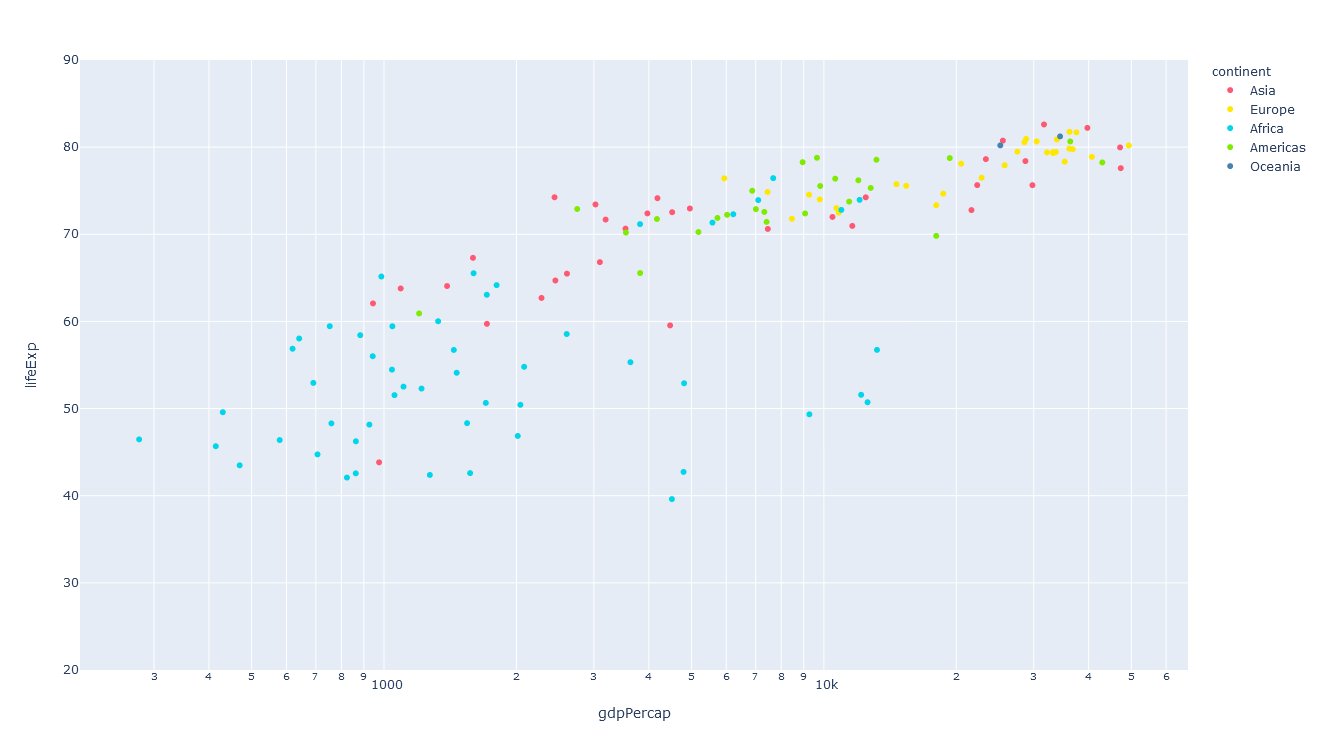

In [13]:
fig = px.scatter(latest_data, 
                 x='gdpPercap',
                 log_x=True,
                 y='lifeExp',
                 color='continent',
                 color_discrete_sequence=["rgb(255, 88, 114)", "rgb(255, 231, 0)", "rgb(0, 213, 233)", "rgb(127, 235, 0)", "steelblue"],
                 height=750, # <-- setting the vertical size of our plot to a fixed value. The 'width' property could also be used to set the horizontal size.
                 hover_name='country')

fig.update_yaxes(range=[20, 90])
fig.show()

#### Updating the Size of Circles

The last thing for us to do is to add an encoding that maps the radius of the circles in our scatter plot to the population number of a country. 

All we have to do for this is to add an encoding from the _pop_ dimension in our data to the _size_ property of our scatter plot:

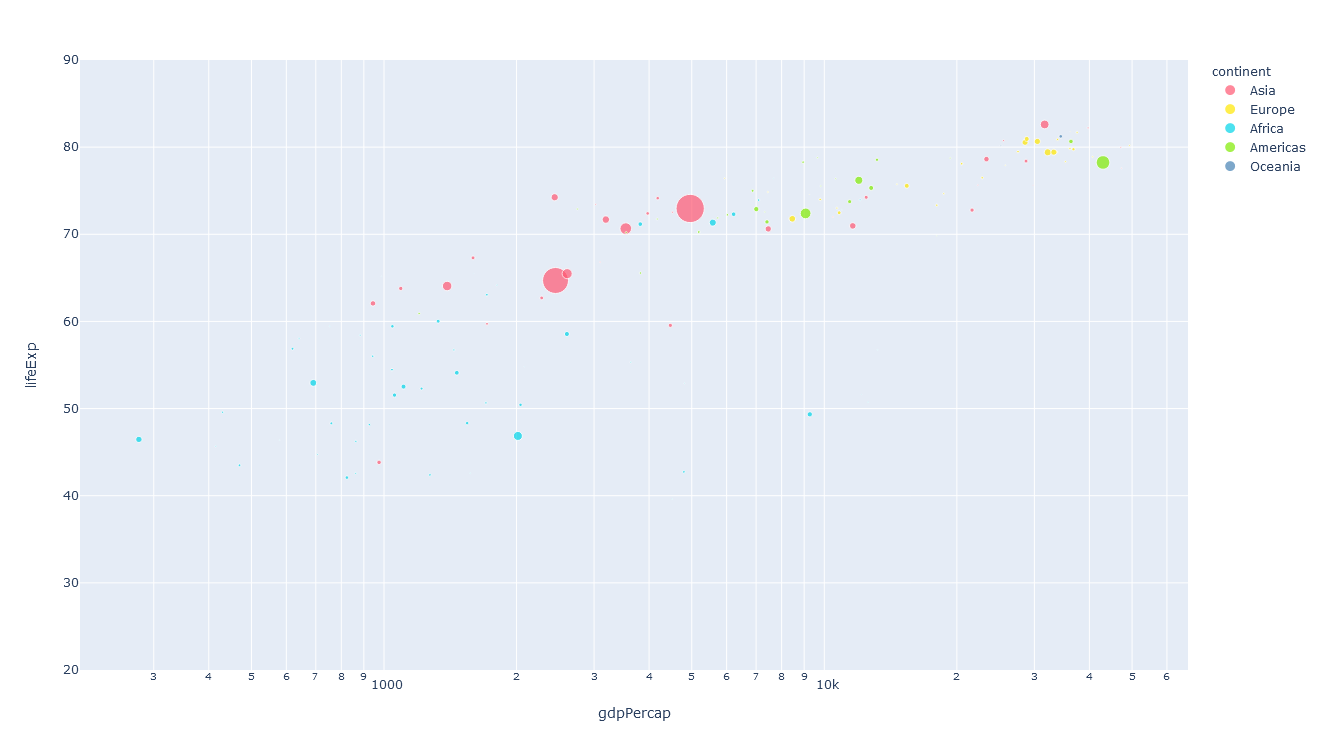

In [14]:
fig = px.scatter(latest_data, 
                 x='gdpPercap',
                 log_x=True,
                 y='lifeExp',
                 color='continent',
                 color_discrete_sequence=["rgb(255, 88, 114)", "rgb(255, 231, 0)", "rgb(0, 213, 233)", "rgb(127, 235, 0)", "steelblue"],
                 size='pop', # <-- mapping population to size channel
                 height=750,
                 hover_name='country')

fig.update_yaxes(range=[20, 90])
fig.show()

These bubbles are a bit too small. Let's fix this by setting the _size_max_ property to a static value:

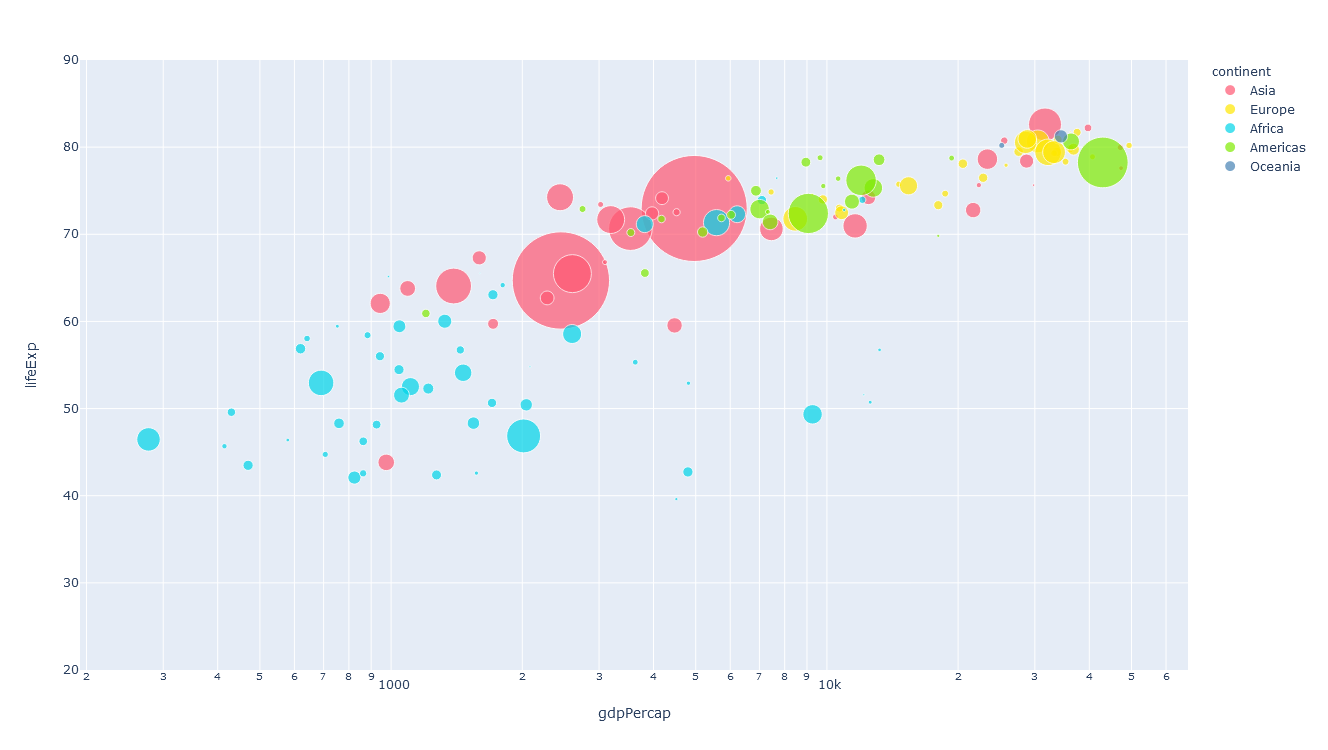

In [15]:
fig = px.scatter(latest_data, 
                 x='gdpPercap',
                 log_x=True,
                 y='lifeExp',
                 color='continent',
                 color_discrete_sequence=["rgb(255, 88, 114)", "rgb(255, 231, 0)", "rgb(0, 213, 233)", "rgb(127, 235, 0)", "steelblue"],
                 size='pop',
                 size_max=75, # <-- increasing the maximum "bubble" size to 75. This basically scales the size of all bubbles by a factor of 75.
                 height=750,
                 hover_name='country')

fig.update_yaxes(range=[20, 90])
fig.show()

That's it. We now have created a static version of the famous GapMinder visualization using plotly. In the next section, we will look into how we can make this visualization interactive, so that we get the full GapMinder experience, allowing us to analyze the change of wealth and health of nations over 60 years.

## 3. Adding Interaction - Linking Views

Another great thing about the GapMinder visualization is that it allows us to explore the global development of health and wealth across the globe. With a simple slider, we can basically see the effects that famine, wars, and peace treaties have had on the life of people. Here, we will reproduce this interaction in plotly. Afterwards, we will have a look at a potential extension to this interaction by linking interactions from multiple views on the data with each other.

### Part 1: Simple Widgets

Plotly makes it very easy for us to create widgets to set parameters for our visualization. For instance, if we want to create a simple slider to select one of many discrete values, all we need to do is use the _animation_ properties of our scatterplot (read more about the animations in the [plotly docs](https://plotly.com/python/animations/)). Basically, it allows us to define dimensions of our data, based on which we want to modify our visualization. 

Before we do that, let's look at our dataset again.

In [16]:
data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


The _animation_ properties specify, which parts of the data belong to the same visual mark. Or, roughly speaking, which parts of the data are represented by the same bubble in our visualization. In our dataset, each actual country is identified by the _country_ property across the measurements for the different years. In order to create an animation widget, we now need to tell plotly to __group__ our data __by__ this dimension (just like with the GROUP BY statement in relational databases) and then animate between different years.

We do so by specifying the _animation_group_ and _animation_frame_ properties of our visualization:

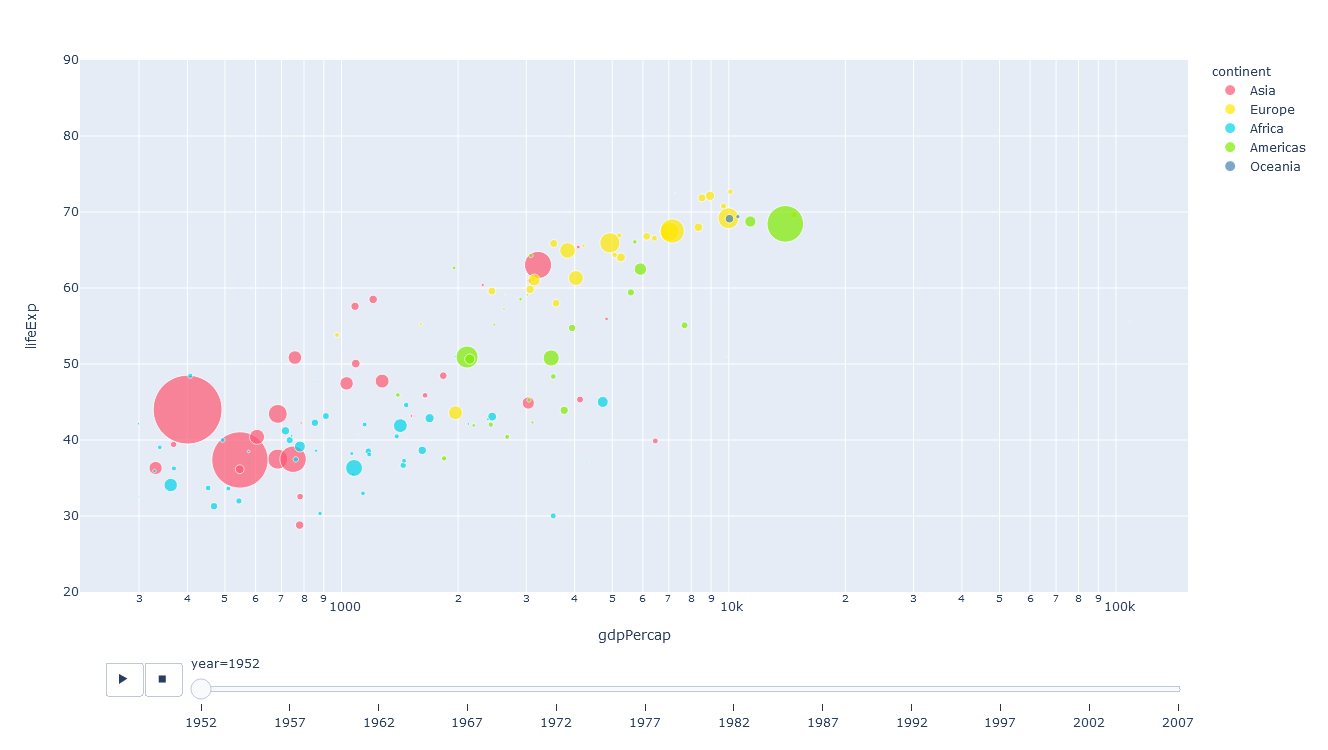

In [17]:
fig = px.scatter(data, # <-- use the entire dataset now, to have access to values from different years not just 2007
                 x='gdpPercap',
                 log_x=True,
                 y='lifeExp',
                 color='continent',
                 color_discrete_sequence=["rgb(255, 88, 114)", "rgb(255, 231, 0)", "rgb(0, 213, 233)", "rgb(127, 235, 0)", "steelblue"],
                 size='pop',
                 size_max=75,
                 height=750,
                 hover_name='country',
                 animation_group='country', # <-- specify how our data is grouped, i.e., what parts of our data belong to the same object
                 animation_frame='year') # <-- specify where to find the data from each 'step' of the animation

fig.update_yaxes(range=[20, 90])
fig.show()

And this is basically it. We now have recreated the famous GapMinder visualization using plotly widgets. 

Up until now, we have discovered how to use many fundamental aspects of the plotly library. First, we looked at the express libarary, which contains a series of interesting test dataset, but also provides us with a variety of basic chart types to choose from. Then, we have looked at one particular dataset (```px.data.gapminder()```) and visualized that dataset using one particular visualization technique (```px.scatter()```). We customized the visualization, until it showed the data in a certain way, updated color scales and axes. Finally, we added interactive behavior to our visualization, allowing us to not only see fixed values at one point in time, but also their development over a period of 60 years.

Next, we will look at some additional features of plotly, which will help us to create more complex visualizations of our data.

### Part 2: Alternative Views on our Data

Up until now, we have only looked at the data through the lens of one visualization and encoding. To get a better impression, it's always a good idea to use multiple visualizatoins of the same dataset, each with its own benefits and drawbacks.

Here, a few other common visualization techniques on the gapminder dataset will be shown and pointers given to relevant resources from the plotly documentation.

#### Stacked Bar Chart: Visualizing the Global Population Growth

Here, we visualize the population per country in a bar chart. Instead of showing all countries next to each other, we group countries per continent and per year in a stacked bar chart. Notice how we did not have to tell plotly anything about the whole stacking mechanism, it does that automatically when setting the _color_ property on ```px.bar()```.

Resources: 
* [Express Bar Chart](https://plotly.com/python/bar-charts/)

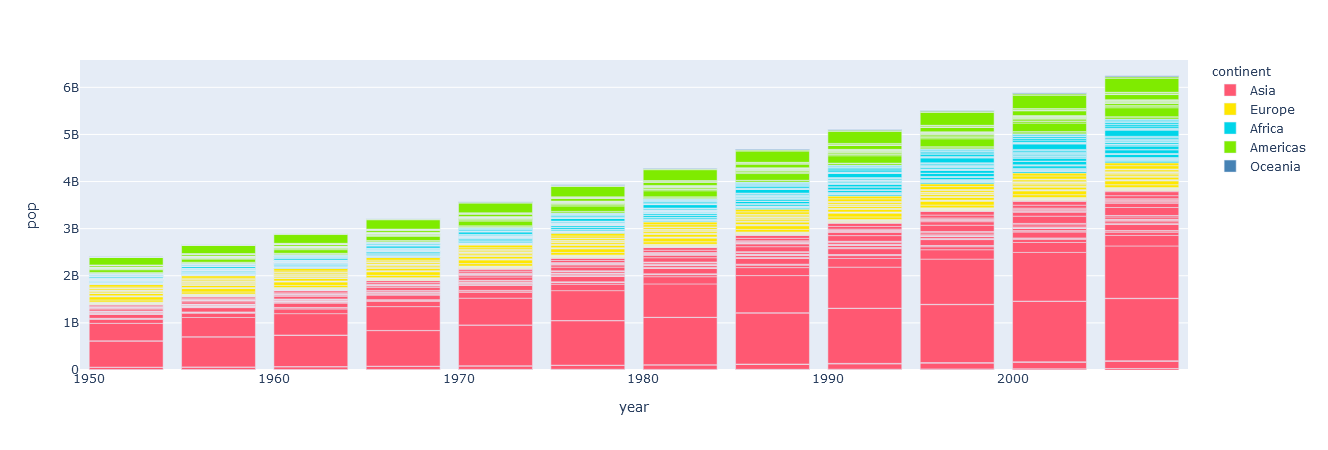

In [18]:
import plotly.graph_objects as go

fig = px.bar(data, 
             x='year', 
             y='pop', 
             color='continent',
             color_discrete_sequence=["rgb(255, 88, 114)", "rgb(255, 231, 0)", "rgb(0, 213, 233)", "rgb(127, 235, 0)", "steelblue"],
             hover_name='country')
fig.show()

#### Grouped Bar Chart: Comparing the Population Growth per Continent

The goal of the grouped bar chart is to make comparisons between different categories across facets of the data. It does so by placing bars next to each other, rather than ontop of each other. While assessing the overall value development becomes difficult that way, we can make comparisons between what in the stacked bar chart would be "layers".

Resources:
* [Express Grouped Bar Chart](https://plotly.com/python/bar-charts/)

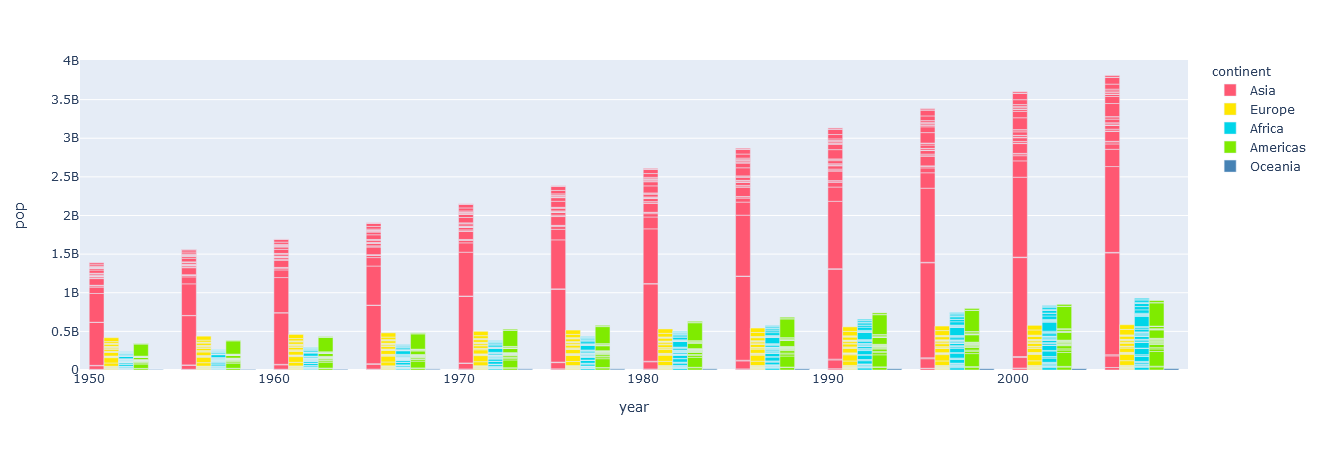

In [19]:
import plotly.graph_objects as go

fig = px.bar(data, 
             x='year', 
             y='pop', 
             color='continent',
             color_discrete_sequence=["rgb(255, 88, 114)", "rgb(255, 231, 0)", "rgb(0, 213, 233)", "rgb(127, 235, 0)", "steelblue"], 
             barmode='group', 
             hover_name='country')
fig.show()

#### Line Chart: Visualizing GDP per continent

The line charts below might seem a bit messy at first, but by using opacity on the lines, we can both see the overall trend in life expectancy for each continent, but also can detect some outliers. For instance, we can clearly see that Afghanistan lies well below the average for the rest of Asia, how Turkey caught up with the rest of Europe during the 1980s and how Rwanda was greatly affected in the early 1990s.

Resources:
* [Express Line Charts](https://plotly.com/python/line-charts/)

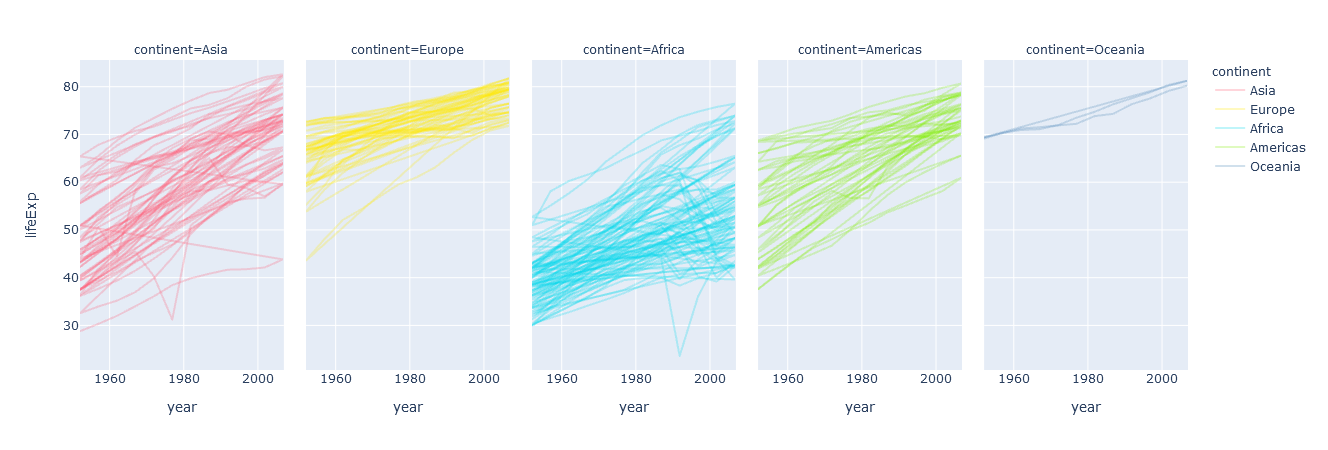

In [20]:
import plotly.express as px

df = px.data.gapminder()
fig = px.line(df, 
              x="year", 
              y="lifeExp", 
              color='continent',
              color_discrete_sequence=["rgba(255, 88, 114, 0.25)", "rgba(255, 231, 0, 0.25)", "rgba(0, 213, 233, 0.25)", "rgba(127, 235, 0, 0.25)", "rgba(70,130,180, 0.25)"], 
              facet_col='continent',
              hover_name='country')

fig.update_traces(marker=dict(opacity=0.1))

fig.show()

## 4. Beyond Plotly - Coordinating Multiple Visualizations with Dash

So far, we have seen that we can easily create the most common visualizations with plotly, and without much customization can already get a good impression of our data. Plotly also supplied us with some basic interactivity for our visualizatoins, basically out-of-the-box. The next step for us in order to build a great visualization that allows us to explore and analyse our dataset, would be to make the interactions in one visualization affect the display of the data in another. This mechanism is called "coordinated views" and is commonly used when visualizing aspects of one dataset from different pespectives. Note that coordinated views are conceptually different from [dashboards](https://en.wikipedia.org/wiki/Dashboard_(business)), which are just a collection of different, "un-coordinated" visualizations.

Plotly does not allow us to generally implement coordination between our visualizations. While there are some special cases, where something similar is possible, we are very much limited in what interactions are possible between two views. And this is why the company behind plotly has developed [dash](https://plotly.com/dash/), a framework that is made for that exact purpose. Just like plotly, Dash can be used together with Python and R, without you having to write any JavaScript code. And just like plotly, it is published under Open Source Licenses and can be used free-of-charge.

The focus of this tutorial was on building visualizations with plotly, so learning about Dash goes beyond its focus. Nevertheless, below you can find some resources on where to start your learning journey in Dash:

* [Dash Documentation](https://dash.plotly.com/)
* [Dash Tutorial](https://dash.plotly.com/installation), which covers all the basics of sharing data between visualizations
* [Project Gallery](https://dash-gallery.plotly.host/Portal/), giving you an overview on what's possible with Dash
